---
---
<center><h1>📍 📍 CSV FILES📍 📍</h1></center>

---

***So far, we have seen the basic introduction of the python libraries that commonly used in data science tasks. Now, the first task is reading different type of files like `JSON`, `TEXT`, `CSV`, `EXCEL`, etc. In this notebook, we will see how to read `CSV` files and what are the different challenges that we face while reading `CSV` files and how to tackle them.***

---


- ***`Pandas` is one of the most used library for reading data sets. In this course, we are going to use pandas for such tasks.***
-  Read more about the pandas here: ***https://pandas.pydata.org/pandas-docs/stable/index.html***

--- 

***Install pandas with the command:*** 

If you are using anaconda with python3: ***`!pip install pandas`***

If you are using jupyter with python3: ***`!pip3 install pandas`***

---

### `Table of Contents`

- ***Reading CSV files***
- ***Challenges with reading the CSV file.***
    - Read the data except the first few rows in the file.
    - Read files present in multiple directories.
    - Check and delimiter and read file.  
    - If the dataset is bigger in size, we can read a few rows only.
    - If the dataset has large number of columns, read only specific columns

---

#### `READING CSV FILES`

---

In [1]:
# import the pandas library
import pandas as pd

In [37]:
# check the python version
pd.__version__

'0.25.1'

---

***Read the `CSV` File***

**`About the Data Set:`** The data set that we are going is use is the Sales Data. It was collected by the data scientists at BigMart for 1559 products across 10 stores in different cities. It contains informations like `Item Identifier`, `Outlet Size`, `Item MRP`, `Outlet Location Type`, `Item Outlet Sales` etc.

---

It is in the directory name **`datasets`** with the name **`big_mart_sales.csv`** 

---

In [2]:
# read the dataset
data = pd.read_csv('datasets/big_mart_sales.csv')

In [3]:
type(data)

pandas.core.frame.DataFrame

---

***You can see that the data is stored in type `DataFrame`***

***`DATAFRAME`***

- DataFrame is a 2-dimensional data structure with columns that can contain different data type.
- Similar to a spreadsheet or SQL table.
- It is generally the most commonly used pandas object. 

In [4]:
# to view the data, we can use the head command
# head(n = "enter the number of rows to want to view from top")

data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


---

***After reading the dataset, the first thing that we check is the size of the dataset. To get the number of rows and columns present in the dataset we have the `shape` attribute.***

---

In [5]:
# to check the dimension of the data set, we can use the shape 
data.shape

(8523, 12)

---

#### `CHALLENGES WITH READING CSV FILE`

- ***Read the data except the first few rows in the file.***
- ***Read files present in multiple directories.***
- ***Check and delimiter and read file.***  
- ***If the dataset is bigger in size, we can read a few rows only.***
- ***If the dataset has large number of columns, read only specific columns***


---

---

***Read the data except the first few rows in the file.***

- You may get an error while reading a CSV file because someone may have added few comments on the top of the file. In pandas we can still read the data set by skipping few rows from the top. 


---

***Read the file `big_mart_sales_top_rows_error.csv` present in the datasets directory.***

--- 

In [6]:
data_with_comments = pd.read_csv('datasets/big_mart_sales_top_row_error.csv')

ParserError: Error tokenizing data. C error: Expected 1 fields in line 4, saw 2


---

- To deal with the **ParseError**, open the csv file in the text editor and check if you have some comments on the top.
- If yes, then count the number of rows to skip.
- While reading file, pass the parameter ***`skiprows = n (number of rows to skip)`***

---

In [7]:
# read the dataset
data_with_comments = pd.read_csv('datasets/big_mart_sales_top_row_error.csv', skiprows= 5)

In [8]:
# view the data
data_with_comments.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


---

---

#### `READING FILES FROM MULTIPLE DIRECTORIES`


- When data is present in mutiple directories, Let's see how to read data in this case. 
- Hers, we have split the same dataset `year wise` into multiple files and stored them into mutliple directories.

- Use the **`glob`** library to list the files in a directory
---

In [9]:
# import the library
import glob

In [10]:
# list all the files in the folder
for directory in glob.glob('datasets/multi-directory/*'):
    print(directory)

datasets/multi-directory\1985
datasets/multi-directory\1987
datasets/multi-directory\1997
datasets/multi-directory\1998
datasets/multi-directory\1999
datasets/multi-directory\2002
datasets/multi-directory\2004
datasets/multi-directory\2007
datasets/multi-directory\2009


---

Now, each of the folders **`1985`**, **`1987`**, **`1997`**, **`1998`**, **`1999`**, **`2002`**, **`2004`**, **`2007`** and **`2009`** contains CSV. We will iterate through each of them and concatenate the files.


---

In [11]:
# iterate through each of the files
for directory in glob.glob('datasets/multi-directory/*'):
    
    for files in glob.glob(directory + '/*'):
        print(files)

datasets/multi-directory\1985\1985.csv
datasets/multi-directory\1987\1987.csv
datasets/multi-directory\1997\1997.csv
datasets/multi-directory\1998\1998.csv
datasets/multi-directory\1999\1999.csv
datasets/multi-directory\2002\2002.csv
datasets/multi-directory\2004\2004.csv
datasets/multi-directory\2007\2007.csv
datasets/multi-directory\2009\2009.csv


---

***Concatenate the files.***

---

In [12]:
# list to store data frames
data_frame_list = []

# iterate through each folder
for directory in glob.glob('datasets/multi-directory/*'):
    
    # iterate through each file
    for files in glob.glob(directory + '/*'):
        # read and append the data frame
        data_frame_list.append(pd.read_csv(files))

In [13]:
# concatenate the dataframes
final_data = pd.concat(data_frame_list)

In [14]:
final_data.head()

,Unnamed: 0,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
1,18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
2,21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
3,23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
4,29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362


---

#### `STORE THE CSV`

---

In [15]:
final_data.to_csv('datasets/merged_big_mart_sales.csv',index=False)

---

#### `Read a CSV of a specific Delimeter`

---

---

- By default, while reading a CSV file pandas consider the seperator as ***`,`***. But if the CSV file has some other seperator or delimiter like ***`[;, \t ]`*** we need to specify that.



---

In [16]:
# read the data
data_delimiter = pd.read_csv('datasets/big_mart_sales_delimiter.csv')

In [17]:
# we can see that the seperator used in the CSV is tab `\t`
data_delimiter

,Item_Identifier\tItem_Weight\tItem_Fat_Content\tItem_Visibility\tItem_Type\tItem_MRP\tOutlet_Identifier\tOutlet_Establishment_Year\tOutlet_Size\tOutlet_Location_Type\tOutlet_Type\tItem_Outlet_Sales
0,FDA15\t9.3\tLow Fat\t0.016047301\tDairy\t249.8...
1,DRC01\t5.92\tRegular\t0.019278216\tSoft Drinks...
2,FDN15\t17.5\tLow Fat\t0.016760075\tMeat\t141.6...
3,FDX07\t19.2\tRegular\t0.0\tFruits and Vegetabl...
4,NCD19\t8.93\tLow Fat\t0.0\tHousehold\t53.8614\...
...,...
96,FDF41\t12.15\tLow Fat\t0.131383762\tFrozen Foo...
97,FDB56\t8.75\tRegular\t0.07461309\tFruits and V...
98,NCP18\t\tLow Fat\t0.028459761\tHousehold\t149....
99,FDB56\t8.75\tRegular\t0.07462720099999999\tFru...


In [18]:
# read the file again with delimiter parameter
data_without_delimiter = pd.read_csv('datasets/big_mart_sales_delimiter.csv',delimiter='\t')

In [19]:
# view the data
data_without_delimiter.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


---

#### `READ FIRST 'N' ROWS (WHEN DATA IS LARGE)`

---

In [20]:
# Specify the number of rows to read 
read_sample_from_data = pd.read_csv('datasets/big_mart_sales.csv',nrows=100)

In [21]:
# shape of the data
read_sample_from_data.shape

(100, 12)

In [22]:
# view the data
read_sample_from_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


---

#### `READ SPECIFIC COLUMNS`

- If the dataset has large number of columns, it is impossible to go through all of them in a single go so we can read only specific columns at a time.

----

In [23]:
# read specific columns
read_specific_columns = pd.read_csv('datasets/big_mart_sales.csv', usecols= ['Item_Identifier', 
                                                                             'Item_Type',
                                                                             'Item_MRP',
                                                                             'Item_Outlet_Sales'])
read_specific_columns

,Item_Identifier,Item_Type,Item_MRP,Item_Outlet_Sales
0,FDA15,Dairy,249.8092,3735.1380
1,DRC01,Soft Drinks,48.2692,443.4228
2,FDN15,Meat,141.6180,2097.2700
3,FDX07,Fruits and Vegetables,182.0950,732.3800
4,NCD19,Household,53.8614,994.7052
...,...,...,...,...
8518,FDF22,Snack Foods,214.5218,2778.3834
8519,FDS36,Baking Goods,108.1570,549.2850
8520,NCJ29,Health and Hygiene,85.1224,1193.1136
8521,FDN46,Snack Foods,103.1332,1845.5976


---

In [27]:
# Specify the number of rows to read 
sampled_chunks=[]
chunk_iterater = pd.read_csv('datasets/big_mart_sales.csv',chunksize=1000)
for chunk in chunk_iterater:
    sampled_chunks.append(chunk.sample(n=100, replace=True))

In [30]:
sampled_data = sampled_chunks.drop_duplicates()


AttributeError: 'list' object has no attribute 'drop_duplicates'

ValueError: cannot reindex on an axis with duplicate labels

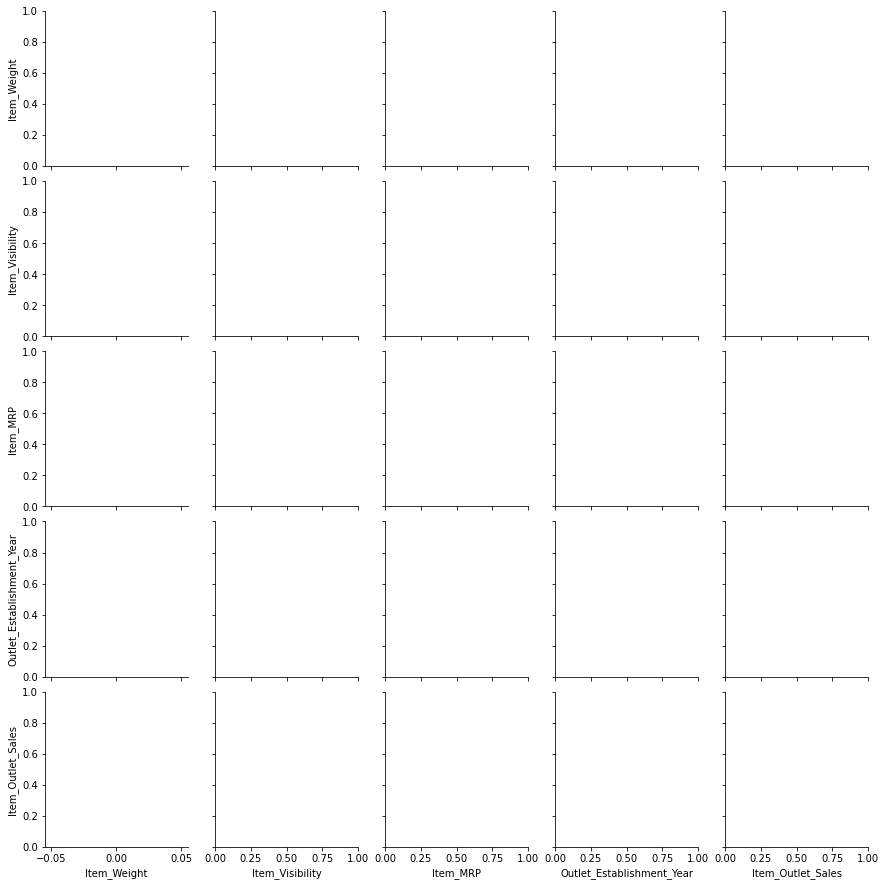

In [29]:
import seaborn as sns
import matplotlib as plt
# Concatenate the sampled chunks into a single DataFrame
sampled_data = pd.concat(sampled_chunks)

# Perform any necessary preprocessing steps on the sampled data
# For example, handle missing values or encode categorical variables

# Visualize the subset data using a pairplot
sns.pairplot(sampled_data, diag_kind='kde')
plt.show()